In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras import backend as K
from keras import regularizers

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
y_train.ndim

1

In [22]:
#image rows and columns = 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [29]:
# convert class vectors to binary class matrices
#10 cuz there are 10 classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [101]:
model = Sequential([
    Conv2D(20, kernel_size = 3, strides = 2, bias_initializer = "zeros", kernel_initializer='he_normal', input_shape = input_shape), #this input shape is the one in the function above
    Activation('relu'),
    Conv2D(30, kernel_size = 3 , strides = 2, kernel_regularizer = regularizers.l2(0.01)),
    Activation('relu'),
    Flatten(),
    Dropout(0.1),
    Dense(128, kernel_regularizer = regularizers.l2(0.001)),
    Activation('relu'),
    Dropout(.2),
    Dense(64, kernel_regularizer = regularizers.l2(0.01)),
    Activation('relu'),
    Dropout(.3),
    Dense(32, kernel_regularizer = regularizers.l2(0.01)),
    Activation('relu'),
    Dropout(.4),
    Dense(16, kernel_regularizer = regularizers.l2(0.01)),
    Activation('relu'),
    Dropout(.5),
    Dense(10, kernel_regularizer = regularizers.l2(0.001)),
    Activation('softmax'),
])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 13, 13, 20)        200       
_________________________________________________________________
activation_100 (Activation)  (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 6, 6, 30)          5430      
_________________________________________________________________
activation_101 (Activation)  (None, 6, 6, 30)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1080)              0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 1080)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)             

In [102]:
callbacks = []
callbacks.append(EarlyStopping('val_accuracy', patience=50, restore_best_weights=True))
callbacks.append(ModelCheckpoint("best-weights.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, period=10))

In [103]:
model.compile(optimizer = 'adam', 
              loss = "categorical_crossentropy", 
              metrics = ['accuracy'])

In [104]:
h = model.fit(x_train, y_train, batch_size = 1000, epochs = 100, validation_data=(x_test, y_test), callbacks = callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 103us/step - loss: 8.4386 - accuracy: 0.1196 - val_loss: 4.1304 - val_accuracy: 0.1960
Epoch 2/100
60000/60000 [==============================] - 5s 79us/step - loss: 4.1570 - accuracy: 0.1401 - val_loss: 3.9158 - val_accuracy: 0.2472
Epoch 3/100
60000/60000 [==============================] - 5s 83us/step - loss: 3.9142 - accuracy: 0.1723 - val_loss: 3.7021 - val_accuracy: 0.3147
Epoch 4/100
60000/60000 [==============================] - 5s 78us/step - loss: 3.6834 - accuracy: 0.2193 - val_loss: 3.3579 - val_accuracy: 0.4926
Epoch 5/100
60000/60000 [==============================] - 5s 76us/step - loss: 3.4312 - accuracy: 0.2892 - val_loss: 2.9690 - val_accuracy: 0.6832
Epoch 6/100
60000/60000 [==============================] - 5s 75us/step - loss: 3.1662 - accuracy: 0.3507 - val_loss: 2.5788 - val_accuracy: 0.7920
Epoch 7/100
60000/60000 [==============================] - 5s

Epoch 53/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.6122 - accuracy: 0.8782 - val_loss: 0.3104 - val_accuracy: 0.9850
Epoch 54/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.6097 - accuracy: 0.8777 - val_loss: 0.3052 - val_accuracy: 0.9864
Epoch 55/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.6026 - accuracy: 0.8797 - val_loss: 0.3111 - val_accuracy: 0.9834
Epoch 56/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.5959 - accuracy: 0.8809 - val_loss: 0.3130 - val_accuracy: 0.9859
Epoch 57/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.5964 - accuracy: 0.8802 - val_loss: 0.2946 - val_accuracy: 0.9862
Epoch 58/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.5865 - accuracy: 0.8806 - val_loss: 0.2943 - val_accuracy: 0.9857
Epoch 59/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.5867 - accuracy: 0.8800

In [105]:
print(h.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [106]:
accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy UNTRAINED: {h.history['val_accuracy'][-1]:.02f}")
print(f"Final Loss on Testing Data UNTRAINED: {accuracy[0]:02f}")
print(f"Final Untrained Test ACCURACY: {accuracy[1]:02f}")

10000/10000 [==============================] - 1s 58us/step
Validation Accuracy UNTRAINED: 0.99
Final Loss on Testing Data UNTRAINED: 0.275319
Final Untrained Test ACCURACY: 0.986600


In [107]:

model.load_weights("best-weights.hdf5")
accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy UNTRAINED: {h.history['val_accuracy'][-1]:.02f}")
print(f"Final Loss on Testing Data TRAINED: {accuracy[0]:02f}")
print(f"Final Trained Test ACCURACY: {accuracy[1]:02f}")

10000/10000 [==============================] - 1s 66us/step
Validation Accuracy UNTRAINED: 0.99
Final Loss on Testing Data TRAINED: 0.260905
Final Trained Test ACCURACY: 0.987900


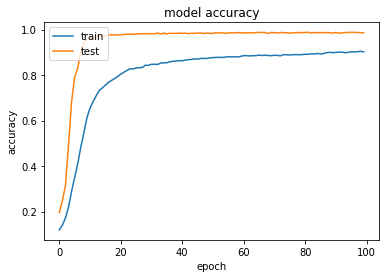

In [108]:
##ACCURACY GRAPH
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

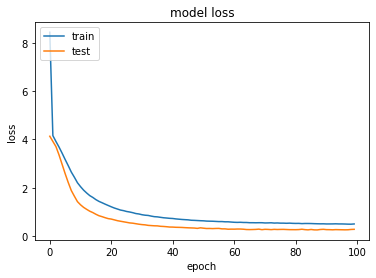

In [109]:
##LOSS GRAPH
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()